<a href="https://colab.research.google.com/github/CeloCruz/EDAs/blob/main/Startups_Success_Fail_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

Here the objective is to analyze data in order to summarize its main characteristics, to better understand the data set, to discover relationships between different variables and to extract important variables for the problem we are trying to solve.

### Objective
The objective of the project is to predict whether a startup that is currently operating will become a success or a failure. The success of a company is defined as the event that provides the founders of the company with a large sum of money through the M&A (Merger and Acquisition) process or an IPO (Initial Public Offering). A company would be considered a failure if it had to close.

In this case I will not go as far as the modeling stage but I do plan to go through all the steps leading up to an EDA and get to Data Preparation.

I will have to answer the following questions:

* How many new companies fail?
* How many start-ups succeed?
* Reasons for failure
* How to avoid failure
* And many other questions...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install squarify
import squarify    
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/startups_clean_2.csv')
df.head(15)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,name,country,year,city,main_category,funding_rounds,funding_filled,first_funding_at,last_funding_at,status,status_class,fail,operating,success
0,#fame,IND,2015,Mumbai,Media,1,10000000,2015-01-05,2015-01-05,operating,operating,0,1,0
1,:Qounter,USA,2014,Delaware City,Application Platforms,2,700000,2014-03-01,2014-10-14,operating,operating,0,1,0
2,"(THE) ONE of THEM,Inc.",USA,2014,NaN,Apps,1,3406878,2014-01-30,2014-01-30,operating,operating,0,1,0
3,0-6.com,CHN,2007,Beijing,Curated Web,1,2000000,2008-03-19,2008-03-19,operating,operating,0,1,0
4,004 Technologies,USA,2010,Champaign,Software,1,10070591,2014-07-24,2014-07-24,operating,operating,0,1,0
5,01Games Technology,HKG,2014,Hong Kong,Games,1,41250,2014-07-01,2014-07-01,operating,operating,0,1,0
6,Ondine Biomedical Inc.,CAN,1997,Vancouver,Biotechnology,2,762851,2009-09-11,2009-12-21,operating,operating,0,1,0
7,H2O.ai,USA,2011,Mountain View,Analytics,4,33600000,2013-01-03,2015-11-09,operating,operating,0,1,0
8,One Inc.,USA,2011,San Francisco,Mobile,3,1150050,2011-07-20,2014-02-05,operating,operating,0,1,0
9,"1,2,3 Listo",CHL,2012,Las Condes,E-Commerce,1,40000,2013-02-18,2013-02-18,operating,operating,0,1,0


Identify and calculate the percentage of the missing values in each attribute

In [ ]:
df.isnull().sum()/df.count()*100

name                 0.001507
country              0.000000
year                 0.000000
city                13.760713
main_category        0.000000
funding_rounds       0.000000
funding_filled       0.000000
first_funding_at     0.036175
last_funding_at      0.000000
status               0.000000
status_class         0.000000
fail                 0.000000
operating            0.000000
success              0.000000
dtype: float64

¿How many startups are in the dataframe?

In [ ]:
df.count().max()

66368

¿How many startups achieve the success?

In [ ]:
success_ratio = df.success.mean()*100
print(f'{df.success[df.success == 1].count()} startups reach success, what means {success_ratio:.2f}% of total')

7096 startups reach success, what means 10.69% of total


¿How many startups fail?

In [ ]:
fail_ratio = df.fail.mean()*100
print(f'{df.fail[df.fail == 1].count()} startups fail, what means {fail_ratio:.2f}% of total')

6238 startups fail, what means 9.40% of total


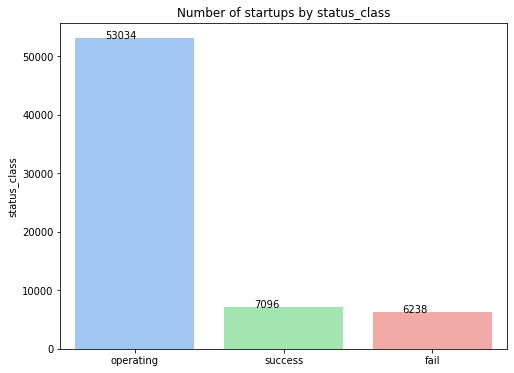

In [ ]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(8,6))
plt.title('Number of startups by status_class')
sns.barplot(x= df.status_class.value_counts().index, y=df.status_class.value_counts())
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-.20,y[i],y[i])

addlabels(df.status_class.value_counts().index,df.status_class.value_counts())

## Filter the startups by foundation year

Let's see only the startups founded after 1990, cause we want to see if there's a pattern between the most recent startups

In [ ]:
df = df[(df.year > 1990) & (df.year < 2023)]
df.count().max()

64859

In [ ]:
def group_by_status(column_name):
  # Group by a feature and calculate the fail/success rate
  group = df.groupby(column_name)[['success','fail','operating']].sum()
  group['total'] = group.sum(axis=1)
  group['success_ratio'] = group.success/group.total
  group['fail_ratio'] = group.fail/group.total
  return group

In [ ]:
year_status = group_by_status('year')
year_status.sort_values(by='year', ascending=False).head()

,success,fail,operating,total,success_ratio,fail_ratio
year,,,,,,
2015,48,621,2791,3460,0.013873,0.179480
2014,151,448,7155,7754,0.019474,0.057777
2013,172,358,7296,7826,0.021978,0.045745
2012,325,509,7097,7931,0.040978,0.064179
2011,455,551,5960,6966,0.065317,0.079098


We can see a very clear outlier, and it corresponds to the year 2016, this is due to the small amount of the sample (only 2 entries), so the percentage is not representative.

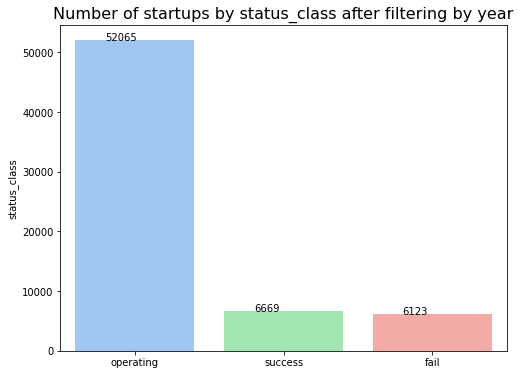

In [ ]:
df = df[df.year < 2016]
plt.figure(figsize=(8,6))
plt.title('Number of startups by status_class after filtering by year', size=16)
sns.barplot(x= df.status_class.value_counts().index, y=df.status_class.value_counts())
addlabels(df.status_class.value_counts().index,df.status_class.value_counts())

In [ ]:
print(f'Number of startups: {df.count().max()}')
print(f'{df.success[df.success == 1].count()} startups reach success, what means {df.success.mean()*100:.2f}% of total')
print(f'{df.fail[df.fail == 1].count()} startups fail, what means {df.fail.mean()*100:.2f}% of total')

Number of startups: 64857
6669 startups reach success, what means 10.28% of total
6123 startups fail, what means 9.44% of total


<AxesSubplot:title={'center':'Years distribution by status'}>

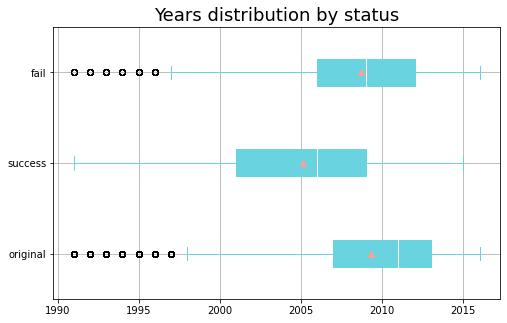

In [ ]:
df_year = pd.DataFrame()
df_year['original'] = df.year
df_year['success'] = df.year[df.success == 1]
df_year['fail'] = df.year[df.fail == 1]

plt.figure(figsize=(8,5))
plt.title('Years distribution by status',size=18)
df_year.boxplot(color='#69D3DF', patch_artist=True, vert=0,showmeans=True, medianprops={'color':'white'})

We can see that both the mean and the median, as well as the large part of the data is in a range of years further away in the successful startups is less than those that have failed, this makes sense, following the same line of our analysis previously performed, in which we observe that the percentage of startups that achieve success is increasingly lower.

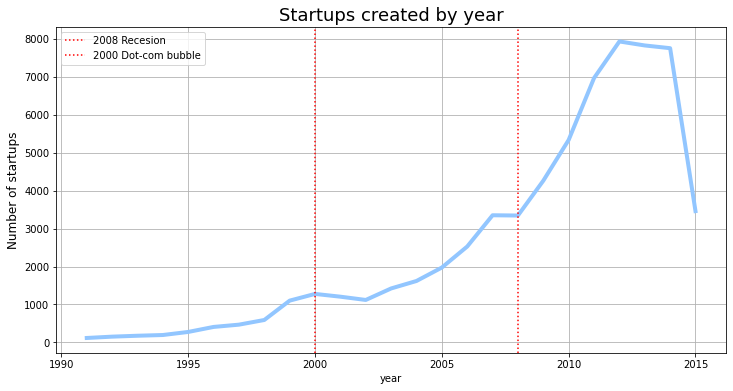

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Startups created by year', size=18)
plt.ylabel('Number of startups',size=12)
plt.grid()

plt.axvline(x=2008, color="red", label="2008 Recesion",linestyle=':')
plt.axvline(x=2000, color="red", label="2000 Dot-com bubble",linestyle=':')
plt.legend()

We can see in the trend line that there was a clear upward trend in terms of startup creation, with only two setbacks, located in 2000 and 2008, which makes sense, due to the crisis experienced during those years. 

However, we can observe a slight drop in 2014 and a huge drop in 2015. This could be explained by the nature of the dataset and the possible lack of entries in the most recent years, as happened in a more extreme way with 2016. 

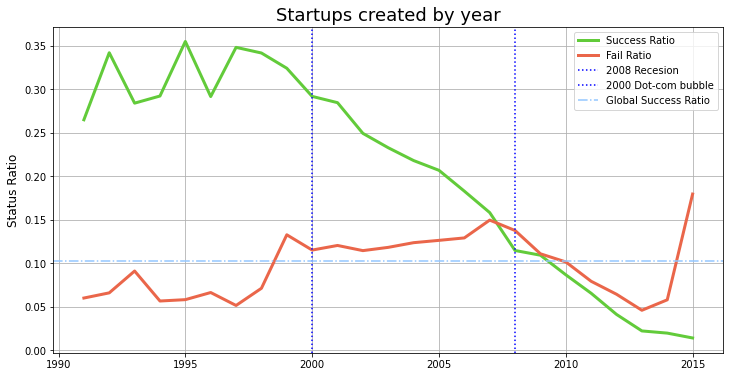

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Startups created by year', size=18)
plt.ylabel('Status Ratio',size=12)
plt.plot(year_status[year_status.index < 2016].index,year_status[year_status.index < 2016].success_ratio,
         label='Success Ratio',color='#62CB3A',linewidth=3)
plt.plot(year_status[year_status.index < 2016].index,year_status[year_status.index < 2016].fail_ratio,
         label='Fail Ratio',color='#EA664A',linewidth=3)
plt.axvline(x=2008, color="blue", label="2008 Recesion",linestyle=':')
plt.axvline(x=2000, color="blue", label="2000 Dot-com bubble",linestyle=':')
plt.axhline(df.success.mean(), label='Global Success Ratio', linestyle='-.')
plt.grid()
plt.legend()

We can see a disturbing trend graph of both the percentage of startups that have succeeded and those that have failed over the years, we can see how in both crises, the trend went through an inflection point, in fact, it is just during the 2008 crisis that both trends intersect. 

The most distressing thing of all is **The clear downward trend in the success rate of startups since its peak in 1997**.

Although the graph of the number of stratups per year showed a large drop, we concluded that this could be due to a failure in the data collection and not to a real drop. Assuming that argument to be true, then we would see an upward trend in the number of startups per year, which would make sense, because it has democratized the use of tools that previously would have been accessible only to the wealthiest people. This means that the number of startups is on the rise, which in turn means that there is more and more competition and fewer startups are the ones that finally reach success in comparison of the total.

## Let's visualize how is the behavior of startups depending on the country.

We'll going to ignore countries with less than 50 startups, because could distort the final result.

In [ ]:
country_status = group_by_status('country')

# Filter by countries with at least 50 startups
countries_most = country_status.total[country_status.total >= 50]
print(f'There are {countries_most.count()} countries with at least 50 startups')

There are 49 countries with at least 50 startups


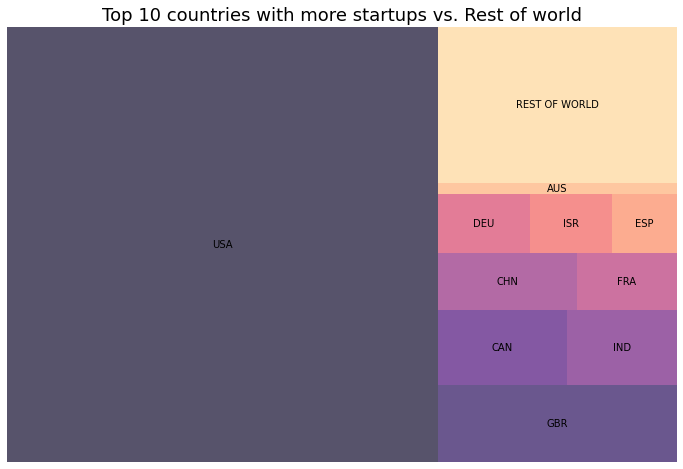

In [ ]:
# Let's the proportion of the total startupos by countries
countries_analysis = country_status[country_status.total >= 50]
top_ten = countries_analysis.total.sort_values(ascending=False).head(10)
rest_world = pd.Series(countries_analysis.total.sort_values(ascending=False)[11:].sum(axis=0), index=['REST OF WORLD'])
world = top_ten.append(rest_world)

plt.figure(figsize=(12,8))
plt.title('Top 10 countries with more startups vs. Rest of world', size=18)
squarify.plot(sizes=world, label=world.index, color=sns.color_palette("magma",len(world)), alpha = 0.7)
plt.axis('off')
plt.show()

We can see that there is quite a wide difference between the US and the rest of the countries, in fact only the US represents more than 60% of the dataset, and has 10 times more startups than the second (UK) in the sample. 

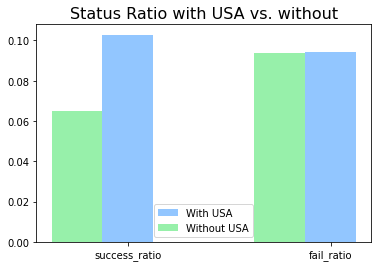

In [ ]:
df_nousa = df[df.country != 'USA']

n = len(['success_ratio','fail_ratio'])
x = np.arange(n)
width = .25

plt.bar(x, df[['success','fail']].mean(), width=width, label='With USA')
plt.bar(x - width, df_nousa[['success','fail']].mean(), width=width, label='Without USA')
plt.title('Status Ratio with USA vs. without', size=16)
plt.xticks(x,['success_ratio','fail_ratio'])
plt.legend()
plt.show()

A large part of the world success rate is influenced by the success rate in the USA, which is not the case for the failure rate.

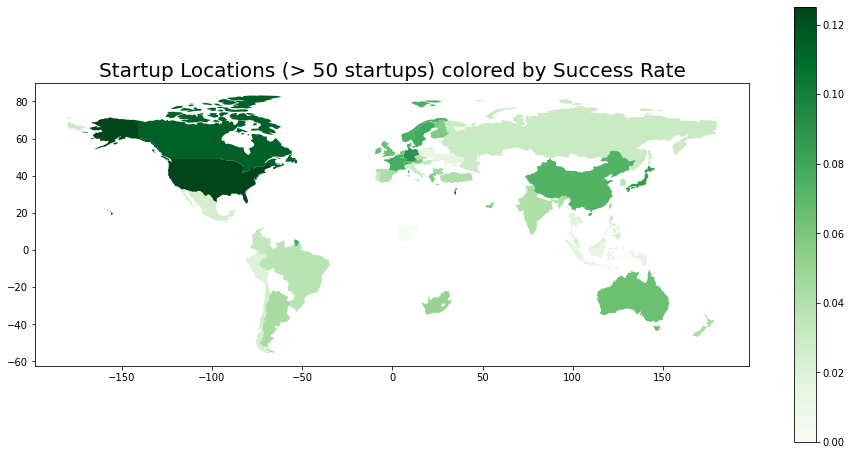

In [ ]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
iso_counts = countries_analysis.success_ratio.reset_index(name='success_ratio')
merged = countries.merge(iso_counts, left_on='iso_a3', right_on='country')
merged.plot(column='success_ratio', cmap='Greens', legend=True, figsize=(16,8))
plt.title('Startup Locations (> 50 startups) colored by Success Rate',size=20)
plt.show()

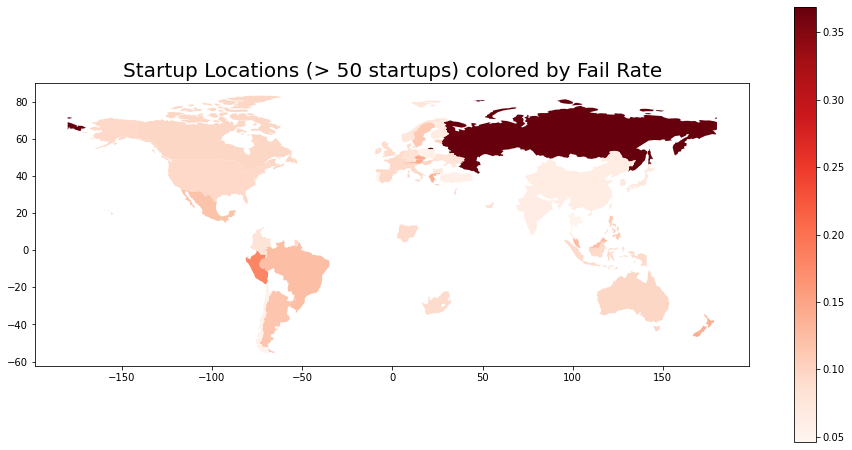

In [ ]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
iso_counts = countries_analysis.fail_ratio.reset_index(name='fail_ratio')
merged = countries.merge(iso_counts, left_on='iso_a3', right_on='country')
merged.plot(column='fail_ratio', cmap='Reds', legend=True, figsize=(16,8))
plt.title('Startup Locations (> 50 startups) colored by Fail Rate',size=20)
plt.show()

We can see that the vast majority of countries with a high success rate are located between North America and Europe (except for Israel, China and Japan).

On the other hand, we can clearly observe Russia as the country with the highest failure rate of all, being much higher than the rest. Followed by Peru, at a considerable distance.

<ipython-input-23-b2b7c002a92e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_analysis['best_ratio'] = countries_analysis.success_ratio/countries_analysis.fail_ratio


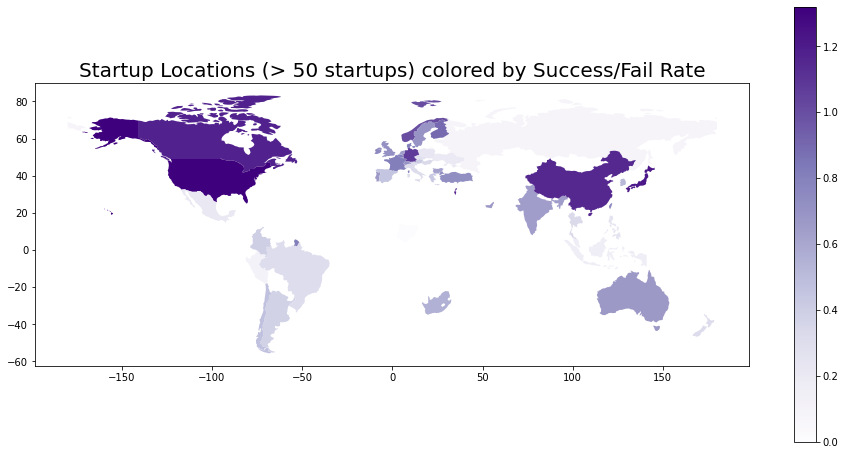

In [ ]:
countries_analysis['best_ratio'] = countries_analysis.success_ratio/countries_analysis.fail_ratio

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
iso_counts = countries_analysis.best_ratio.reset_index(name='best_ratio')
merged = countries.merge(iso_counts, left_on='iso_a3', right_on='country')
merged.plot(column='best_ratio', cmap='Purples', legend=True, figsize=(16,8))
plt.title('Startup Locations (> 50 startups) colored by Success/Fail Rate',size=20)
plt.show()

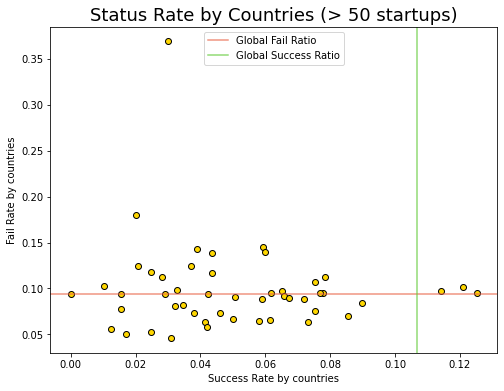

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Status Rate by Countries (> 50 startups)', size=18)
plt.ylabel('Fail Rate by countries')
plt.xlabel('Success Rate by countries')
plt.axhline(0.094, label='Global Fail Ratio', linestyle='-', color='#EA664A', alpha=.7)
plt.axvline(0.1069, label='Global Success Ratio', linestyle='-',color='#62CB3A', alpha=.7)
plt.legend(loc='upper center')
plt.scatter(countries_analysis.success_ratio,countries_analysis.fail_ratio, color='gold', edgecolor='k')

We have a condensation of countries, but there are particularly 5 that stand out from the rest of the group, on the one hand we have Russia and Peru, with a high failure rate, being the case of Russia the most extreme (with a failure rate of 3.5 times the global average rate).

On the other hand, we have USA, Israel and Canada, being the only ones to exceed the global average success rate.

### Let's break down the countries by year

In [ ]:
country_year = group_by_status(['country','year'])

# Filter by total of startups founded at that year
country_year[country_year['total'] > 20].sort_values(by='success_ratio',ascending=False).head(10)

success  fail  operating  total  success_ratio  fail_ratio
country year                                                            
USA     1997      131    16        184    331       0.395770    0.048338
ISR     2000       11     5         12     28       0.392857    0.178571
USA     1998      161    30        230    421       0.382423    0.071259
        1995       78    13        115    206       0.378641    0.063107
GBR     1999       17     8         22     47       0.361702    0.170213
USA     1992       39     8         62    109       0.357798    0.073394
        1999      286   103        426    815       0.350920    0.126380
        1993       42     9         71    122       0.344262    0.073770
        1996       98    17        179    294       0.333333    0.057823
        2000      280    99        499    878       0.318907    0.112756

In [ ]:
country_year[country_year['total'] > 20].sort_values(by='fail_ratio',ascending=False).head(10)

success  fail  operating  total  success_ratio  fail_ratio
country year                                                            
RUS     2012        0    65         60    125       0.000000    0.520000
        2013        1    39         61    101       0.009901    0.386139
        2009        3     8         11     22       0.136364    0.363636
KOR     2015        0    12         21     33       0.000000    0.363636
RUS     2011        1    27         47     75       0.013333    0.360000
BRA     2009        3     9         15     27       0.111111    0.333333
DNK     2015        0     6         16     22       0.000000    0.272727
ISR     2015        1    13         37     51       0.019608    0.254902
FRA     2015        0    15         44     59       0.000000    0.254237
CAN     2003        7    11         26     44       0.159091    0.250000

We can clearly see a huge presence of the United States in the top, showing a great success rate in different years.

Another fact is that the most recent year that appears in the top is 2001, which coincides with what was previously discovered (the downward trend in the success rate of startups), confirming that it is global.

Definitely we can say that it is very important, the time and place, when starting a business, as these directly affect the chances of success or failure of a business. Although we can say that the percentage of success is more influenced by the country where the startup was founded has a greater weight than the year of foundation. 

## US cities
Since the USA is by far the largest producer of startups worldwide, let's take a closer look at which cities have the largest number of startups, as well as their success/failure ratios. 

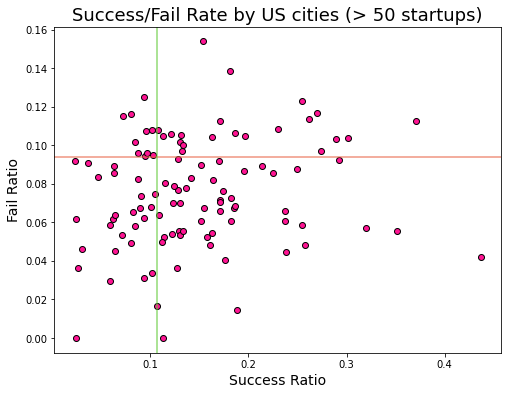

In [ ]:
# We're gonna ignore those null values in city

usa_startups = df[df.country == 'USA']
usa_startups = usa_startups[usa_startups.city.notnull()]

usa_cities = usa_startups.groupby('city')[['fail','success','operating']].sum()
usa_cities['total'] = usa_cities.sum(axis=1)
usa_cities['success_ratio'] = usa_cities.success/usa_cities.total
usa_cities['fail_ratio'] = usa_cities.fail/usa_cities.total
usa_cities_most = usa_cities[usa_cities.total > 50]

successful_cities = usa_cities[usa_cities.total > 50].sort_values(by='success_ratio', ascending=False)

plt.figure(figsize=(8,6))
plt.scatter(usa_cities_most.success_ratio,usa_cities_most.fail_ratio, color='deeppink', edgecolor='k')
plt.title('Success/Fail Rate by US cities (> 50 startups)', size=18)
plt.ylabel('Fail Ratio', size=14)
plt.xlabel('Success Ratio', size=14)
plt.axhline(0.094, label='Global Fail Ratio', linestyle='-', color='#EA664A', alpha=.7)
plt.axvline(0.1069, label='Global Success Ratio', linestyle='-',color='#62CB3A', alpha=.7)

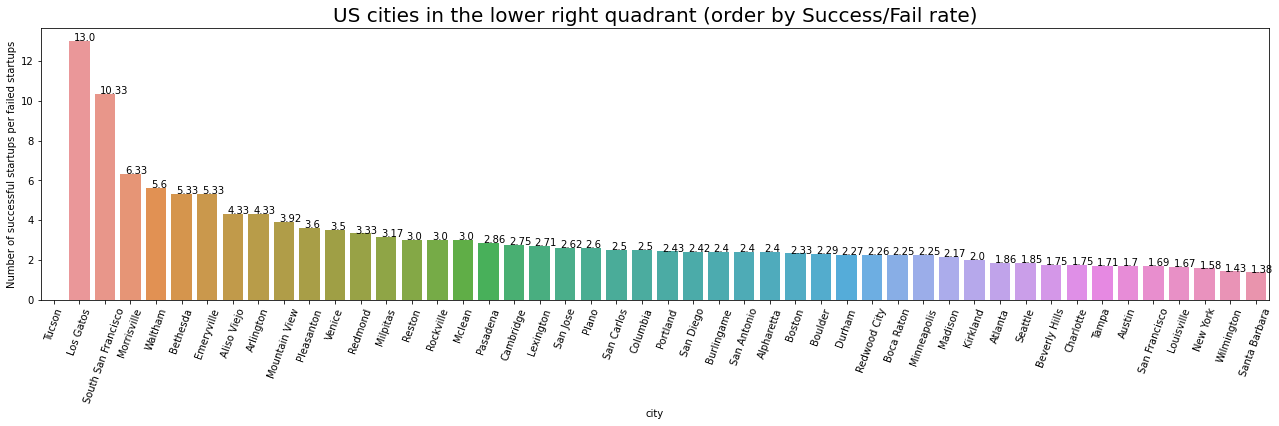

In [ ]:
uscities_bestratio = usa_cities_most[(usa_cities_most.success_ratio > success_ratio/100) & (usa_cities_most.fail_ratio < fail_ratio/100)]
uscities_bestratio = uscities_bestratio.success_ratio/uscities_bestratio.fail_ratio
uscities_bestratio = uscities_bestratio.sort_values(ascending=False)

plt.figure(figsize=(22,5))
sns.barplot(x=uscities_bestratio.index,y=uscities_bestratio)
plt.title('US cities in the lower right quadrant (order by Success/Fail rate)', size=20)
plt.ylabel('Number of successful startups per failed startups')
plt.xticks(rotation=70)
addlabels(uscities_bestratio.index,round(uscities_bestratio,2))
plt.show()

`Tucson` has zero closed startups registered so far, so, we cannot calculate a ratio of successful startups versus failures. We see that there are many cities with very high ratios, which means that there are many geographic areas in the USA where it is much more likely to succeed than to fail.

We can see the big difference in spreads between the global success/failure rates (which are very close to each other), and on the other hand, there is a very big spread when we compare that of the cities with the most startups in the USA.

1. of the 25 US cities with the most startups, only 6 do not exceed the level of the worldwide success ratio. And 5 of them more than double the global success rate.
2. Only Los Angeles has a failure rate higher than the success rate.


## ¿Are there categories with a higher success ratio?

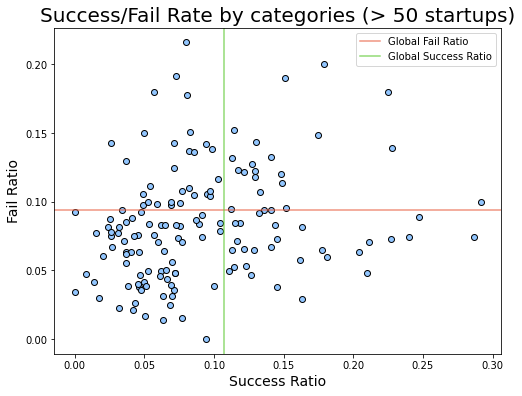

In [ ]:
category_ratio = group_by_status('main_category')
category_ratio = category_ratio[category_ratio.index != 'Other']
category_ratio = category_ratio[category_ratio.total > 50]

plt.figure(figsize=(8,6))
plt.title('Success/Fail Rate by categories (> 50 startups)', size=20)
plt.ylabel('Fail Ratio', size=14)
plt.xlabel('Success Ratio', size=14)
plt.scatter(category_ratio.success_ratio, category_ratio.fail_ratio, edgecolor='k')
plt.axhline(0.094, label='Global Fail Ratio', linestyle='-', color='#EA664A', alpha=.7)
plt.axvline(0.1069, label='Global Success Ratio', linestyle='-',color='#62CB3A', alpha=.7)
plt.legend(loc='upper right')

We can see that in the lower right quadrant is where the categories that interest us most are, since they are those with the highest hit rate, and at the same time a lower failure rate. At the top left are all those categories that we would like to avoid. 

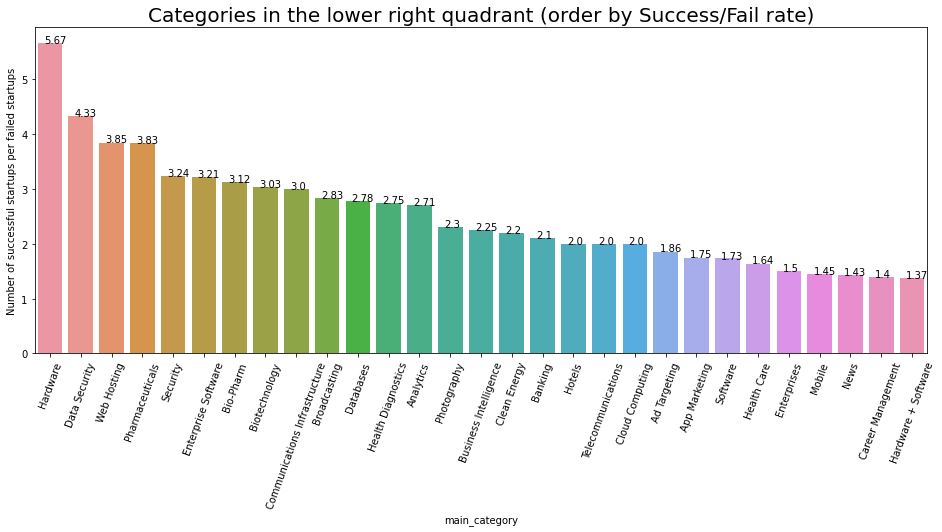

In [ ]:
categories_bestratio = category_ratio[(category_ratio.success_ratio > success_ratio/100) & (category_ratio.fail_ratio < fail_ratio/100)]
categories_bestratio = categories_bestratio.success_ratio/categories_bestratio.fail_ratio
categories_bestratio = categories_bestratio.sort_values(ascending=False)

plt.figure(figsize=(16,6))
plt.title('Categories in the lower right quadrant (order by Success/Fail rate)', size=20)
plt.ylabel('Number of successful startups per failed startups')
plt.xticks(rotation=70)
sns.barplot(x=categories_bestratio.index,y=categories_bestratio)

addlabels(categories_bestratio.index,round(categories_bestratio,2))
plt.show()

As expected, the vast majority of startups that appear in the top with the highest success rate are companies dedicated to the technology sector.

We see that there are categories where startups have ratios of up to 5:1, i.e. for every startup that is closed 5 were acquired or went public.

## ¿Is there any relation between funding rounds and success/fail rate?

<AxesSubplot:title={'center':'Status by funding_rounds'}, xlabel='funding_rounds'>

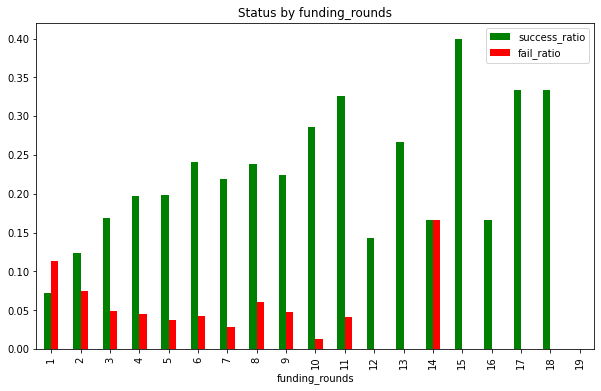

In [ ]:
funding_status = group_by_status('funding_rounds')
funding_status[['success_ratio','fail_ratio']].plot(kind='bar', stacked=False, color=['green','red'], figsize=(10,6), title='Status by funding_rounds')

In [ ]:
funding_status.total

funding_rounds
1     41281
2     12159
3      5544
4      2705
5      1452
6       769
7       415
8       214
9       125
10       77
11       49
12       28
13       15
14        6
15        5
16        6
17        3
18        3
19        1
Name: total, dtype: int64

A large percentage of startups have received less than 3 rounds of funding. 

Text(0.5, 0, 'Financing received (logarithmic scale)')

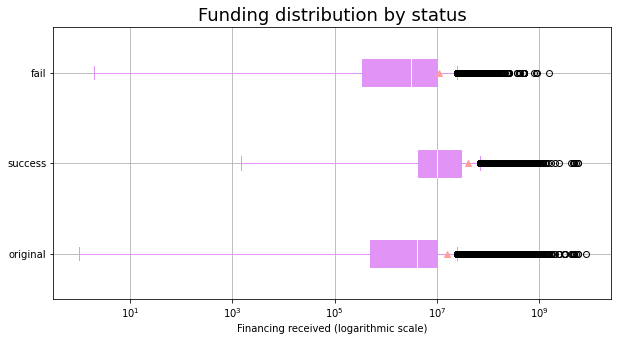

In [ ]:
df_funding = pd.DataFrame()
df_funding['original'] = df.funding_filled
df_funding['success'] = df.funding_filled[df.success == 1]
df_funding['fail'] = df.funding_filled[df.fail == 1]

plt.figure(figsize=(10,5))
plt.xscale('log')
plt.title('Funding distribution by status',size=18)
df_funding.boxplot(color='#E193F6', patch_artist=True, vert=0,showmeans=True, medianprops={'color':'white'})
plt.xlabel('Financing received (logarithmic scale)')

In [ ]:
df_funding[['success','fail']].describe()

,success,fail
count,6.669000e+03,6.123000e+03
mean,4.025030e+07,1.082646e+07
std,1.889407e+08,3.922704e+07
min,1.500000e+03,2.000000e+00
25%,4.290000e+06,3.500000e+05
50%,1.007059e+07,3.167062e+06
75%,3.000000e+07,1.007059e+07
max,5.820000e+09,1.567504e+09


The successful stratups have received more funding than the unsuccessful ones, although this is not an extreme difference either. Both the mean and median are relatively close. What we can observe is that the IQR range is narrower for the successful startups.

Text(0.5, 1.0, 'Funding received by success startups (IQR range)')

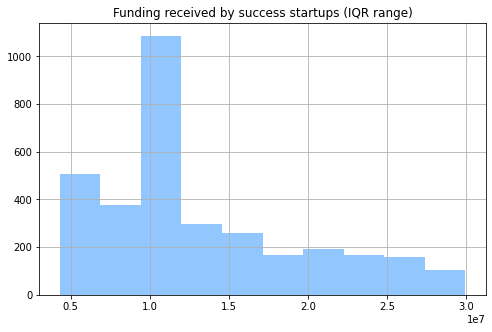

In [ ]:
df.funding_filled[(df.funding_filled > np.percentile(df.funding_filled[df.success == 1], q=25)) 
& (df.funding_filled < np.percentile(df.funding_filled[df.success == 1], q=75)) 
& (df.success == 1)].hist(
    figsize=(8,5),
)
plt.title('Funding received by success startups (IQR range)')

Text(0.5, 1.0, 'Funding received by fail startups (IQR range)')

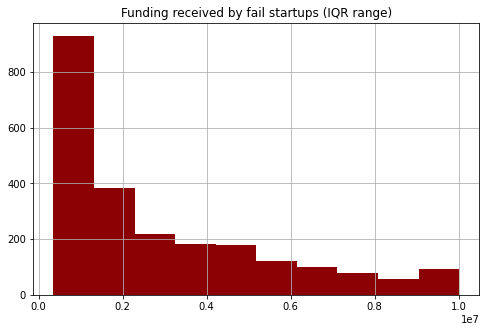

In [ ]:
df.funding_filled[(df.funding_filled > np.percentile(df.funding_filled[df.fail == 1], q=25)) 
& (df.funding_filled < np.percentile(df.funding_filled[df.fail == 1], q=75)) 
& (df.fail == 1)].hist(
    figsize=(8,5), color='darkred'
)
plt.title('Funding received by fail startups (IQR range)')

We can conclude that the amount of money received is related to the failure or success of a startup, however, we must point out that we are probably facing a bi-directional causality, since, thinking logically, if a company receives a greater amount of funding it will be more likely to expand and overcome problems, but it is also true that for a company to receive a greater amount of money it is normal that it is because it has a good potential, or because it has been doing things right. 

So, it is inconclusive to say that the success or failure of a company is determined by the amount of money it receives.